[Delaunay doc](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.Delaunay.html)


### Pre Poceso
#### Malla
Se arma una malla definida por:
* _elem_: número de cada nodo que compone un elemento  $\quad elem[n]=[i,j,k]$ 
* _nodos_: coordenadas  $(x,y)$ para un nodo. $\quad nodos[i]=[x_i, y_i]$


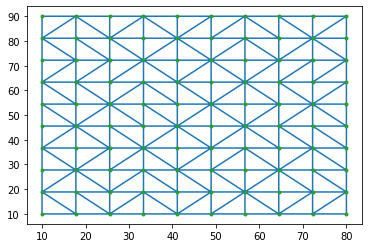

In [1]:
import numpy as np
from scipy.spatial import Delaunay

def squareMesh(xmin,xmax,nx, ymin,ymax,ny):
    x = np.linspace(xmin, xmax, nx)
    y = np.linspace(ymin, ymax, ny)
    xv, yv = np.meshgrid(x, y)
    points = np.array([xv.flatten(),yv.flatten()]).T
    mesh = Delaunay(points)
    return (mesh.simplices , mesh.points, mesh)

#elem:number of node of each element   #nodos: x, y  for every node
elem, nodos , mesh=squareMesh(10,80,10,10,90,10)

import matplotlib.pyplot as plt
%matplotlib inline

plt.triplot(nodos[:,0], nodos[:,1], elem.copy())
plt.plot(nodos[:,0], nodos[:,1],'.' )
plt.show()

Encontrar un elemento a partir de sus las posiciones de sus nodos:

In [2]:
xi=np.array([[2,3],[3,3],[2,4]])
mesh.find_simplex(xi)

array([-1, -1, -1], dtype=int32)

Nodos que componen un elemento:

In [3]:
elem[10]

array([80, 91, 90], dtype=int32)

Posiciones en $x,y$ de un nodo

In [4]:
mesh.points[1], mesh.points[7], mesh.points[0]

(array([17.77777778, 10.        ]),
 array([64.44444444, 10.        ]),
 array([10., 10.]))

Busco el número del nodo a partir de sus poscion en $x,y$


In [5]:
def nodo(x,y):
    num=0
    for i in nodos:
        if i[0]==x:
            if i[1]==y:
                return (num)
        num+=1

nodo(10,90), nodos[nodo(10,90)]

(90, array([10., 90.]))

Busco **todos** los nodos en los que $x=10$

In [6]:
min(nodos[:,0])

10.0

In [7]:
izq=np.where(nodos[:,0]==10)[0]
izq

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

Busco **todos** los nodos en los que $y=90$

In [8]:
base=np.where(mesh.points[:,1]==90)[0]
base

array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

Defino una matriz para las **Condiciones de Contorno** (*Boundary Conditions*)

nodo   eje(x o y)  fijo/movil

In [9]:
DOFs=len(nodos)*2
cond=np.zeros([DOFs+2,3])

In [10]:
for i in range(0,len(izq),2):
    cond[i,0]=izq[i]
    cond[i,1]=1 #x
    #cond[i,]

for i in range(1,len(izq),2):
    cond[i,0]=izq[i]
    cond[i,1]=2 #x
    #cond[i,]

Para un elemento $e$, tenemos que sus nodos son: 

In [11]:
e=1
nodo1 = nodos[elem[e][0]]
nodo2 = nodos[elem[e][1]]
nodo3 = nodos[elem[e][2]]

nodo1, nodo2, nodo3

(array([72.22222222, 10.        ]),
 array([80.        , 18.88888889]),
 array([72.22222222, 18.88888889]))

***

***

## Malla en 3d

In [12]:
import numpy as np
x1 = np.linspace(0, 1, 2)
y1 = np.linspace(0, 0, 1)
z1 = np.linspace(0, 2, 2)

x2 = np.linspace(0, 0, 1)
y2 = np.linspace(0, 1, 2)
z2 = np.linspace(0, 2, 2)

x=x1+x2
y=y1+y2
z=z1+z2
mesh = np.meshgrid(x, y, z)
nodes = np.array(list(zip(*(dim.flat for dim in mesh))))
nodes

array([[0., 0., 0.],
       [0., 0., 4.],
       [1., 0., 0.],
       [1., 0., 4.],
       [0., 1., 0.],
       [0., 1., 4.],
       [1., 1., 0.],
       [1., 1., 4.]])

In [13]:
from scipy.spatial import Delaunay

malla = Delaunay(nodes)

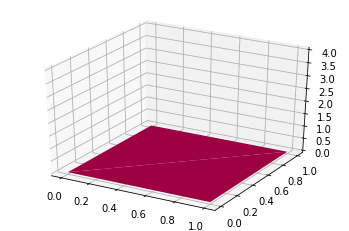

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
from scipy.spatial import Delaunay
tri=malla
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# The triangles in parameter space determine which x, y, z points are
# connected by an edge
#ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.plot_trisurf(nodes[:,0], nodes[:,1],nodes[:,2], triangles=tri.simplices, cmap=plt.cm.Spectral)


plt.show()